In [1]:
import jieba.posseg as pseg
import numpy as np
import os


# 读取文本文件中的所有文本
with open("no_stopwords.txt", "r", encoding="utf-8") as f:
    text = f.read()

# 分词并标注词性
words = pseg.cut(text)

# 找到所有与实体相邻的形容词和副词
window_size = 4
entity = ["2019-12", "2020-01", "2020-05", "2020-11"]
adj_adv_list = []
for i, (word, pos) in enumerate(words):
    if word is in entity:
        left = max(0, i - window_size)
        right = min(i + window_size, len(words))
        for j in range(left, right):
            if j != i and 0 <= j < len(words):
                if words[j].flag in ["a", "ad"]:
                    adj_adv_list.append((words[j].word, words[j].flag))
print("finish finding adjs and advs")

# 将形容词和副词组合成“副词_形容词”的形式
new_words = []
for i in range(len(adj_adv_list)):
    if i == 0 or adj_adv_list[i-1][1] == "d":
        new_words.append(adj_adv_list[i][0])
    else:
        new_words[-1] += "_" + adj_adv_list[i][0]

# 找到所有出现在情感词列表中的词语
sentiment_in_window = list(set(new_words).intersection(set(sentiment_words)))
print("finish finding sentiment in window")



[[ 0.          1.52211244  4.13662834  2.45184626  2.37766416  0.22035723]
 [ 2.49316544  0.          4.19959684  2.13571784  1.68842658 -0.0693297 ]
 [ 2.9692462   5.57764728  0.         -0.60891524  2.3054303   0.63361915]
 [ 0.68614338  1.24715937  3.73218821  0.          2.02165729  3.48427793]
 [ 1.55802818  4.94246699  4.53998242  2.86353185  0.          3.5767862 ]
 [-0.47432304  0.6622931   2.00691206  3.62310975  6.09087559  0.        ]]


In [1]:
import jieba.posseg as pseg
import os
from numpy import *
import math

In [ ]:

data = np.array([[1.0,2,5,2,4,1],[22,2,6,3,6,1],[11,8,33,7,5,1],[1,2,5,2,4,1],[1,2,5,2,4,1],[1,2,5,2,4,1]])

In [ ]:
data

In [ ]:
x = data[:,0].transpose()
y = data[0,:]

In [ ]:
-dot(x,y)

In [ ]:
joint_proximity = 1 / (0.5 + math.exp(-dot(x,y)))
print("{:.50f}".format(joint_proximity))

In [ ]:
KL = -data[0,0] * np.log(joint_proximity)
print(KL)

In [ ]:
data[0,0] = KL

In [ ]:
data

In [2]:
import jieba  
import jieba.posseg
import jieba.analyse
import jieba.posseg as pseg

In [5]:
import jieba.posseg as pseg

# 分词
text = '这个产品比较好，质量更_好'
seg_list = list(pseg.cut(text))

print(seg_list)

[pair('这个', 'r'), pair('产品', 'n'), pair('比较', 'd'), pair('好', 'a'), pair('，', 'x'), pair('质量', 'n'), pair('更', 'd'), pair('_', 'x'), pair('好', 'a')]


In [59]:
import jieba.posseg as pseg
# 读取 corpus 文件
with open("new_corpus12.txt", "r", encoding="utf-8", errors='ignore') as f:
    lines = f.readlines()

# 初始化列表变量
distances = []
nearest_sentiment_words = []
entity = ["2019-12", "2020-01", "2020-05", "2020-11"]


for line in lines:
    words = line.split(" ")
    #print("lines:", words)
    for i in range(len(words)):
        if words[i] in entity:
            #print("entity:", words[i])
            # 查找最近的情感词汇
            for j in range(max(0, i-10), min(len(words), i+10)):
                if words[j].startswith('#') and words[j].endswith('#'):
                    nearest_sentiment_words.append(words[j])
                    distance = abs(j - i)
                    distances.append(distance)

                        
#print(distances)                




In [60]:
len(set(nearest_sentiment_words))

983

In [61]:
import operator
near_dic = {}

for word in nearest_sentiment_words:
    if word in near_dic.keys():
        near_dic[word] = near_dic[word] + 1
    else:
        near_dic[word] = 1
sorted_near_dic = dict(sorted(near_dic.items(),key = operator.itemgetter(1), reverse=True))
print(sorted_near_dic)
print(len(sorted_near_dic.keys()))


{'#明显#': 1406, '#健康#': 1172, '#卫生#': 898, '#新#': 896, '#不适#': 554, '#恐慌#': 520, '#更_大#': 408, '#尚未_明确#': 401, '#成熟#': 394, '#具体#': 386, '#常见#': 374, '#有效#': 345, '#小#': 267, '#好#': 255, '#一般#': 226, '#大#': 196, '#稳定#': 191, '#直接#': 178, '#都_平安#': 178, '#高#': 174, '#严重#': 172, '#低#': 164, '#很_重要#': 154, '#更_容易#': 146, '#舒适#': 145, '#最大#': 132, '#未_完全#': 125, '#少#': 120, '#容易#': 115, '#不同#': 100, '#安全#': 90, '#早#': 86, '#简单#': 71, '#微#': 70, '#微博#': 68, '#完全#': 65, '#突然#': 63, '#积极#': 63, '#平安#': 60, '#热#': 58, '#最好#': 58, '#极_低#': 57, '#平稳#': 55, '#急促#': 55, '#更是_高#': 54, '#最强#': 49, '#重要#': 49, '#公开#': 46, '#全#': 43, '#远#': 42, '#详情#': 42, '#易#': 41, '#最_常见#': 41, '#强#': 41, '#越来越_严重#': 38, '#长#': 37, '#高热#': 37, '#近#': 36, '#特殊#': 35, '#紧张#': 35, '#最#': 35, '#明确#': 35, '#不_高#': 34, '#不再_暗沉#': 33, '#乏力#': 33, '#心慌#': 33, '#无效#': 31, '#迅速#': 31, '#较_高#': 31, '#很大#': 29, '#连续#': 28, '#重#': 28, '#正确#': 28, '#不_容易#': 28, '#成功#': 28, '#良好#': 28, '#富贵#': 28, '#重大#': 28, '#罕见#': 27, '#头疼#': 2

2019-12词云

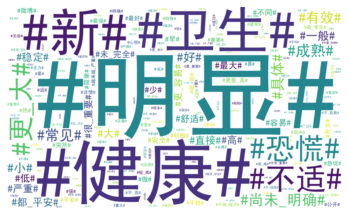

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 定义字典（键是词语，值是出现次数）


# 创建WordCloud对象，并将词频字典传递给generate_from_frequencies()方法
wordcloud = WordCloud(font_path='SimHei.ttf', background_color='white',width=4000,height=2400,).generate_from_frequencies(sorted_near_dic)

# 绘制词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 去除坐标轴
plt.show()


2020-05词云

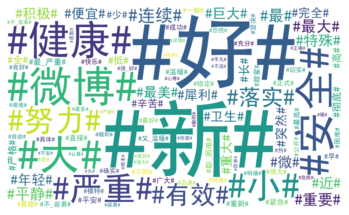

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 定义字典（键是词语，值是出现次数）


# 创建WordCloud对象，并将词频字典传递给generate_from_frequencies()方法
wordcloud = WordCloud(font_path='SimHei.ttf', background_color='white',width=4000,height=2400,max_words=100).generate_from_frequencies(sorted_near_dic)

# 绘制词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 去除坐标轴
plt.show()


2020-11词云

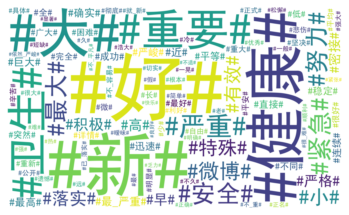

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 定义字典（键是词语，值是出现次数）


# 创建WordCloud对象，并将词频字典传递给generate_from_frequencies()方法
wordcloud = WordCloud(font_path='SimHei.ttf', background_color='white',width=4000,height=2400,max_words=100).generate_from_frequencies(sorted_near_dic)

# 绘制词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 去除坐标轴
plt.show()

三个月的词云

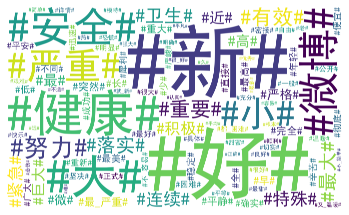

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 定义字典（键是词语，值是出现次数）


# 创建WordCloud对象，并将词频字典传递给generate_from_frequencies()方法
wordcloud = WordCloud(font_path='SimHei.ttf', background_color='white',width=8000,height=4800,max_words=100).generate_from_frequencies(sorted_near_dic)

# 绘制词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 去除坐标轴
plt.show()

In [79]:
# 计算平均距离
if distances:
    avg_distance = sum(distances) / len(distances)
    print("最近的情感词汇的平均距离为：", avg_distance)
else:
    print("未找到匹配的情感词汇。")

最近的情感词汇的平均距离为： 5.613162118780096


In [ ]:
set_nearest = set(nearest_sentiment_words)
with open('nearest_sentiment_words.txt','w') as f:
    for word in set_nearest:
        f.write(word + "\n")

In [62]:
target_words = ["2019-12", "2020-05", "2020-11"]
words = []


for x in sorted_near_dic.keys():
    target_words.append(x)

print(target_words)
print(len(target_words))

['2019-12', '2020-05', '2020-11', '#明显#', '#健康#', '#卫生#', '#新#', '#不适#', '#恐慌#', '#更_大#', '#尚未_明确#', '#成熟#', '#具体#', '#常见#', '#有效#', '#小#', '#好#', '#一般#', '#大#', '#稳定#', '#直接#', '#都_平安#', '#高#', '#严重#', '#低#', '#很_重要#', '#更_容易#', '#舒适#', '#最大#', '#未_完全#', '#少#', '#容易#', '#不同#', '#安全#', '#早#', '#简单#', '#微#', '#微博#', '#完全#', '#突然#', '#积极#', '#平安#', '#热#', '#最好#', '#极_低#', '#平稳#', '#急促#', '#更是_高#', '#最强#', '#重要#', '#公开#', '#全#', '#远#', '#详情#', '#易#', '#最_常见#', '#强#', '#越来越_严重#', '#长#', '#高热#', '#近#', '#特殊#', '#紧张#', '#最#', '#明确#', '#不_高#', '#不再_暗沉#', '#乏力#', '#心慌#', '#无效#', '#迅速#', '#较_高#', '#很大#', '#连续#', '#重#', '#正确#', '#不_容易#', '#成功#', '#良好#', '#富贵#', '#重大#', '#罕见#', '#头疼#', '#显著#', '#根本#', '#很_难#', '#广泛#', '#更_长#', '#最_重要#', '#严格#', '#确实#', '#单纯#', '#轻#', '#非常_重要#', '#很好#', '#太_大#', '#不_彻底#', '#剧烈#', '#幸运#', '#粗糙#', '#平均#', '#非常_好#', '#干净#', '#不_简单#', '#慌#', '#疲劳#', '#不足#', '#复杂#', '#痛#', '#最高#', '#不_明显#', '#正式#', '#不要_恐慌#', '#很_好#', '#认真#', '#极其_罕见#', '#老#', '#寒冷#', '#清洁#', '#肥大#', '

In [63]:
import numpy as np

# 读取文本文件
with open("new_corpus12.txt", "r", encoding="utf-8", errors='ignore') as f:
    lines = f.readlines()

# 构建共现矩阵
matrix12 = np.zeros((len(target_words), len(target_words)), dtype=int)
window_size = 4
for line in lines:
    words = line.split()
    for i in range(len(words)):
        if words[i] in target_words:
            for j in range(i-window_size, i+window_size+1):
                if j < 0 or j >= len(words) or j == i:
                    continue
                if words[j] in target_words:
                    matrix12[target_words.index(words[i])][target_words.index(words[j])] += 1
'''

# 输出共现矩阵
print(" ".ljust(6), end="")
for word in target_words:
    print(word.ljust(6), end="")
print()
for i in range(len(target_words)):
    print(target_words[i].ljust(6), end="")
    for j in range(len(target_words)):
        print(str(matrix12[i][j]).ljust(6), end="")
    print()
'''
# 输出共现矩阵的前30行30列
print(" ".ljust(6), end="")
for word in target_words[:30]:
    print(word.ljust(6), end="")
print()
for i in range(30):
    print(target_words[i].ljust(6), end="")
    for j in range(30):
        print(str(matrix12[i][j]).ljust(6), end="")
    print()



      2019-122020-052020-11#明显#  #健康#  #卫生#  #新#   #不适#  #恐慌#  #更_大# #尚未_明确##成熟#  #具体#  #常见#  #有效#  #小#   #好#   #一般#  #大#   #稳定#  #直接#  #都_平安##高#   #严重#  #低#   #很_重要##更_容易##舒适#  #最大#  #未_完全#
2019-1222916 0     0     1239  862   769   781   108   134   407   1     390   197   328   211   179   224   205   167   188   172   178   123   147   143   143   145   144   45    125   
2020-050     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
2020-110     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
#明显#  1239  0     0     18    4     0     8     258   1     1     0     1     178   5     1     5     9     3     5     1     68    0     4     9     2     0     0     0     4     4     
#健康#  862   0     0     4     170   873   14    2     2   

2019-12热力图

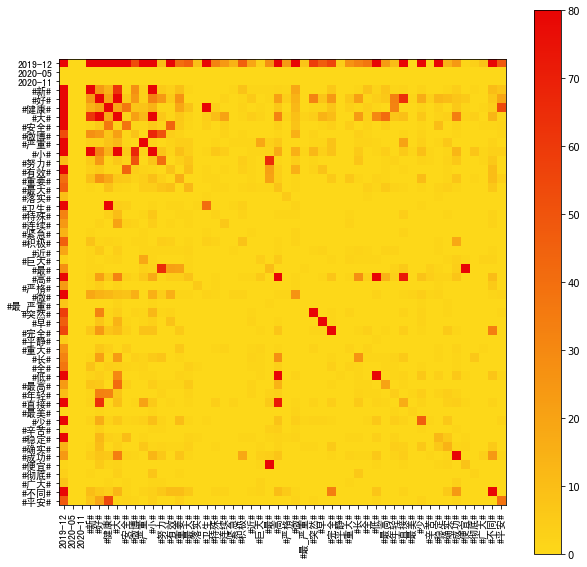

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap

font = FontProperties(fname='SimHei.ttf')
# 定义刻度的分界值和对应的颜色
colors = [(0, '#FDD819'),  (1, '#E80505')]  # 定义渐变色的位置和颜色值
cmap = LinearSegmentedColormap.from_list('my_cmap', colors)


# 获取前 50 行和列
top_50_indices = np.arange(50)
target_words_top_50 = [target_words[i] for i in top_50_indices]
matrix_top_50 = matrix12[top_50_indices, :][:, top_50_indices]
for i in range(50):
    for j in range(50):
        if matrix_top_50[i][j] > 80:
            matrix_top_50[i][j] = 80

# 生成热力图
plt.figure(figsize=(10, 10))
plt.imshow(matrix_top_50, cmap=cmap)

# 设置刻度标签
plt.xticks(np.arange(len(target_words_top_50)), target_words_top_50, rotation=90, fontproperties=font)
plt.yticks(np.arange(len(target_words_top_50)), target_words_top_50, fontproperties=font)


plt.colorbar()


# 显示热力图
plt.show()


In [8]:
import numpy as np

# 读取文本文件
with open("new_corpus05.txt", "r", encoding="utf-8", errors='ignore') as f:
    lines = f.readlines()

# 构建共现矩阵
matrix05 = np.zeros((len(target_words), len(target_words)), dtype=int)
window_size = 4
for line in lines:
    words = line.split()
    for i in range(len(words)):
        if words[i] in target_words:
            for j in range(i-window_size, i+window_size+1):
                if j < 0 or j >= len(words) or j == i:
                    continue
                if words[j] in target_words:
                    matrix05[target_words.index(words[i])][target_words.index(words[j])] += 1

'''

# 输出共现矩阵
print(" ".ljust(6), end="")
for word in target_words:
    print(word.ljust(6), end="")
print()
for i in range(len(target_words)):
    print(target_words[i].ljust(6), end="")
    for j in range(len(target_words)):
        print(str(matrix12[i][j]).ljust(6), end="")
    print()
'''
# 输出共现矩阵的前30行30列
print(" ".ljust(6), end="")
for word in target_words[:30]:
    print(word.ljust(6), end="")
print()
for i in range(30):
    print(target_words[i].ljust(6), end="")
    for j in range(30):
        print(str(matrix05[i][j]).ljust(6), end="")
    print()

      2019-122020-052020-11#新#   #好#   #健康#  #大#   #安全#  #微博#  #严重#  #小#   #努力#  #有效#  #重要#  #最大#  #落实#  #卫生#  #特殊#  #连续#  #紧急#  #积极#  #近#   #巨大#  #最#   #高#   #严格#  #微#   #最_严重##突然#  #早#   
2019-120     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
2020-050     18587520     52738 46397 27592 32192 30597 33394 20904 20107 17008 20534 12114 12735 14843 6242  11677 17973 5643  10539 8959  11787 4567  7498  6945  12227 7667  9681  6118  
2020-110     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
#新#   0     52738 0     17604 2912  1091  3285  465   1920  166   2171  733   928   605   401   267   186   286   134   84    460   328   129   70    366   77    553   51    193   302   
#好#   0     46397 0     2912  53380 2720  6780  1303  7698

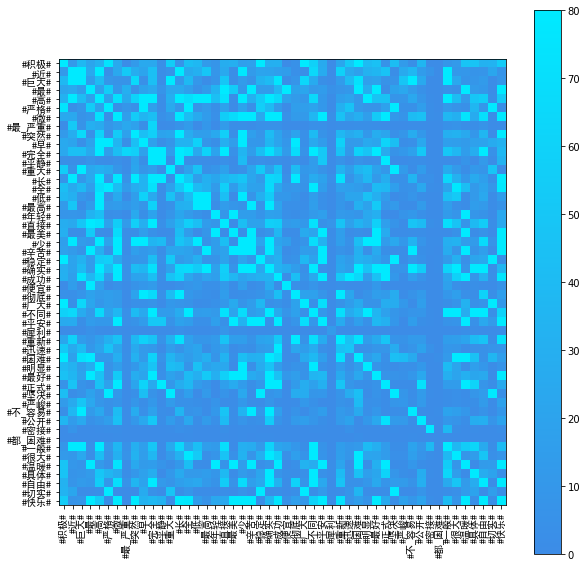

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap

font = FontProperties(fname='SimHei.ttf')
# 定义刻度的分界值和对应的颜色
colors = [(0, '#3C8CE7'),  (1, '#00EAFF')]  # 定义渐变色的位置和颜色值
cmap = LinearSegmentedColormap.from_list('my_cmap', colors)


# 获取前 50 行和列
top_50_indices = np.arange(20,70)
target_words_top_50 = [target_words[i] for i in top_50_indices]
matrix_top_50 = matrix05[top_50_indices, :][:, top_50_indices]
for i in range(50):
    for j in range(50):
        if matrix_top_50[i][j] > 80:
            matrix_top_50[i][j] = 80

# 生成热力图
plt.figure(figsize=(10, 10))
plt.imshow(matrix_top_50, cmap=cmap)

# 设置刻度标签
plt.xticks(np.arange(len(target_words_top_50)), target_words_top_50, rotation=90, fontproperties=font)
plt.yticks(np.arange(len(target_words_top_50)), target_words_top_50, fontproperties=font)


plt.colorbar()


# 显示热力图
plt.show()


In [9]:
import numpy as np

# 读取文本文件
with open("new_corpus11.txt", "r", encoding="utf-8", errors='ignore') as f:
    lines = f.readlines()

# 构建共现矩阵
matrix11 = np.zeros((len(target_words), len(target_words)), dtype=int)
window_size = 4
for line in lines:
    words = line.split()
    for i in range(len(words)):
        if words[i] in target_words:
            for j in range(i-window_size, i+window_size+1):
                if j < 0 or j >= len(words) or j == i:
                    continue
                if words[j] in target_words:
                    matrix11[target_words.index(words[i])][target_words.index(words[j])] += 1

'''

# 输出共现矩阵
print(" ".ljust(6), end="")
for word in target_words:
    print(word.ljust(6), end="")
print()
for i in range(len(target_words)):
    print(target_words[i].ljust(6), end="")
    for j in range(len(target_words)):
        print(str(matrix12[i][j]).ljust(6), end="")
    print()
'''
# 输出共现矩阵的前30行30列
print(" ".ljust(6), end="")
for word in target_words[:30]:
    print(word.ljust(6), end="")
print()
for i in range(30):
    print(target_words[i].ljust(6), end="")
    for j in range(30):
        print(str(matrix11[i][j]).ljust(6), end="")
    print()

      2019-122020-052020-11#新#   #好#   #健康#  #大#   #安全#  #微博#  #严重#  #小#   #努力#  #有效#  #重要#  #最大#  #落实#  #卫生#  #特殊#  #连续#  #紧急#  #积极#  #近#   #巨大#  #最#   #高#   #严格#  #微#   #最_严重##突然#  #早#   
2019-120     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
2020-050     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
2020-110     0     133331431339 41581 22620 18582 12501 11073 17062 8349  14394 10132 16914 15867 7795  5647  11397 4903  8215  7202  5672  5729  1609  6547  7188  3262  7051  3839  6767  
#新#   0     0     31339 12542 2289  774   1233  250   1540  143   613   361   204   485   288   136   111   319   278   120   428   261   217   70    274   65    193   57    123   144   
#好#   0     0     41581 2289  30664 2384  3904  766   2831

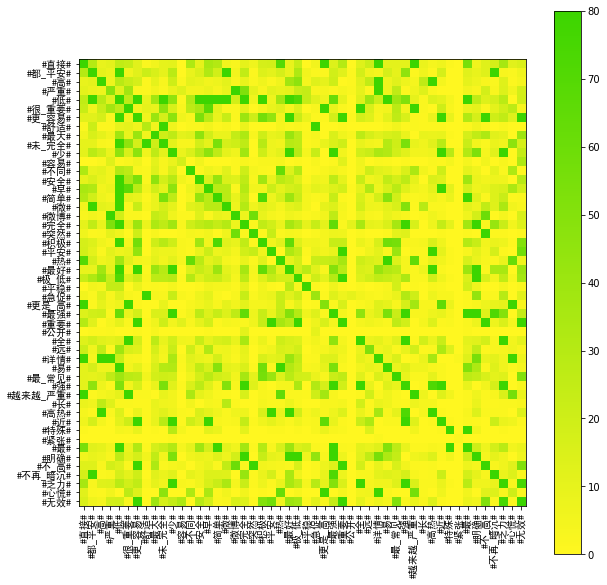

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap

font = FontProperties(fname='SimHei.ttf')
# 定义刻度的分界值和对应的颜色
colors = [(0, '#FFF720'),  (1, '#3CD500')]  # 定义渐变色的位置和颜色值
cmap = LinearSegmentedColormap.from_list('my_cmap', colors)


# 获取前 50 行和列
top_50_indices = np.arange(20,70)
target_words_top_50 = [target_words[i] for i in top_50_indices]
matrix_top_50 = matrix11[top_50_indices, :][:, top_50_indices]
for i in range(50):
    for j in range(50):
        if matrix_top_50[i][j] > 80:
            matrix_top_50[i][j] = 80

# 生成热力图
plt.figure(figsize=(10, 10))
plt.imshow(matrix_top_50, cmap=cmap)

# 设置刻度标签
plt.xticks(np.arange(len(target_words_top_50)), target_words_top_50, rotation=90, fontproperties=font)
plt.yticks(np.arange(len(target_words_top_50)), target_words_top_50, fontproperties=font)


plt.colorbar()


# 显示热力图
plt.show()


In [83]:
import numpy as np

# 检查方阵的维度是否相同
if matrix11.shape == matrix05.shape == matrix12.shape:
    # 创建空白方阵用于存储相加结果
    result = np.zeros_like(matrix11)

    # 对应位置的元素逐个相加
    result = matrix11  + matrix05

    # 打印相加结果
    # 输出共现矩阵的前30行30列
    print(" ".ljust(6), end="")
    for word in target_words[:30]:
        print(word.ljust(6), end="")
    print()
    for i in range(30):
        print(target_words[i].ljust(6), end="")
        for j in range(30):
            print(str(result[i][j]).ljust(6), end="")
        print()
else:
    print("两个方阵的维度不匹配，无法相加。")


两个方阵的维度不匹配，无法相加。


In [66]:
import math
import numpy as np

matrix = matrix12.astype(np.float)
# 对于每个元素，计算它所在的行和列的向量，并计算它们的 joint proximity
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        row_vec = matrix[i, :]
        col_vec = matrix[:, j]
        joint_proximity = 1 / (1 + math.exp(-np.dot(row_vec, col_vec)))
        joint = float("{:.50f}".format(joint_proximity))
        KL = -matrix[i, j] * np.log(joint)
        matrix[i, j] = KL

# 输出 KL 矩阵
print(" ".ljust(6), end="")
for word in target_words[:30]:
    print(word.ljust(6), end="")
print()
for i in range(30):
    print(target_words[i].ljust(6), end="")
    for j in range(30):
        print(str(matrix[i][j]).ljust(6), end="")
    print()




/tmp/ipykernel_79487/4195607216.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = matrix12.astype(np.float)


      2019-122020-052020-11#明显#  #健康#  #卫生#  #新#   #不适#  #恐慌#  #更_大# #尚未_明确##成熟#  #具体#  #常见#  #有效#  #小#   #好#   #一般#  #大#   #稳定#  #直接#  #都_平安##高#   #严重#  #低#   #很_重要##更_容易##舒适#  #最大#  #未_完全#
2019-12-0.0  0.0   0.0   -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  39.15771093977785
2020-050.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2020-110.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
#明显#  -0.0  0.0   0.0   -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  0.0   -0.0  -0.0  -0.0  -0.0  0.0   -0.0  -0.0  2.772588722239781
#健康#  -0.0  0.0   0.0   -0.0  -0.0  

In [15]:
# 输出 KL 矩阵
print(" ".ljust(6), end="")
for word in target_words[-30:]:
    print(word.ljust(6), end="")
print()
for i in range(len(target_words)-30, len(target_words)):
    print(target_words[i].ljust(6), end="")
    for j in range(len(target_words)-30, len(target_words)):
        print(str(matrix[i][j]).ljust(6), end="")
    print()

      #奇观#  #不_正好##就_清晰##不_轻松##已经_顺利##必须_坚决##不俗#  #清热#  #欢#   #太烦#  #老弱#  #蛮_好# #拘谨#  #又_长# #最_迫切##最为_严峻##幼稚#  #蛮好#  #最_正确##又_紧# #挺_久# #最_干净##其实_根本##却_不同##极_特殊##更加_特殊##太_强烈##苦涩#  #最_抠门##曾_公开#
#奇观#  4.4572210896381944e-070.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
#不_正好#0.0   -0.0  -0.0  -0.0  -0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   -0.0  -0.0  0.0   -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  0.0   0.0   -0.0  
#就_清晰#0.0   -0.0  -0.0  -0.0  -0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   -0.0  -0.0  0.0   -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  0.0   0.0   -0.0  
#不_轻松#0.0   -0.0  -0.0  -0.0  -0.0  -0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   -0.0  -0.0  0.0   -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  0.0   -0.0  -0.0  
#已经_顺利#0.0   -0.0  -0.0  -0.0  -0.0  -0.0  0

In [68]:
import numpy as np

def train_glove(matrix, vec_dim, learning_rate, num_epochs, alpha=0.75, decay_rate=0.99):
    m = len(matrix)
    # 初始化参数
    W = np.random.randn(m, vec_dim) * 0.01
    b = np.random.randn(m) * 0.01
    U = np.random.randn(m, vec_dim) * 0.01
    d = np.random.randn(m) * 0.01

    # 计算权重因子
    X = matrix / matrix.sum(axis=1, keepdims=True)
    X[X == 0] = 1e-10
    
    weights = np.zeros((m, m))
    W_idx, U_idx = np.nonzero(matrix)
    for i, j in zip(W_idx, U_idx):
        weights[i, j] = (matrix[i, j] / X[i, j])**alpha
    
    # 训练模型
    for epoch in range(num_epochs):
        for i, j in zip(W_idx, U_idx):
            w = W[i]
            u = U[j]
            w_dot_u = np.dot(w, u)
            cost = weights[i, j] * (w_dot_u + b[i] + d[j] - np.log(matrix[i, j])) ** 2
            grad_w = weights[i, j] * (w_dot_u + b[i] + d[j] - np.log(matrix[i, j])) * u
            grad_u = weights[i, j] * (w_dot_u + b[i] + d[j] - np.log(matrix[i, j])) * w
            grad_b = weights[i, j] * (w_dot_u + b[i] + d[j] - np.log(matrix[i, j]))
            grad_d = weights[i, j] * (w_dot_u + b[i] + d[j] - np.log(matrix[i, j]))

            # 截断中间结果
            grad_w = np.clip(grad_w, -1e3, 1e3)
            grad_u = np.clip(grad_u, -1e3, 1e3)

            # 更新参数
            W[i] -= learning_rate * grad_w
            U[j] -= learning_rate * grad_u
            b[i] -= learning_rate * grad_b
            d[j] -= learning_rate * grad_d

        # 衰减学习率
        learning_rate *= decay_rate
        
        # 截断损失函数
        mask = (weights > 0)
        clipped_diff = np.clip(np.dot(W, U.T) + b.reshape(-1, 1) + d.reshape(1, -1) - np.log(matrix), -10, 10)
        error = np.sum(weights * np.nan_to_num(clipped_diff) ** 2) / np.sum(weights)
        loss = np.sqrt(error)
        if np.isnan(loss):
            raise ValueError("Loss is NaN")

        print('Epoch:', epoch, 'Loss:', loss)

    # 返回训练好的向量
    return (W + U) / 2

# 构造随机矩阵
#test_matrix = np.random.rand(986, 986)

# 使用随机矩阵训练GloVe模型
vectors = train_glove(matrix, 50, 0.001, 20)
print(vectors)


/tmp/ipykernel_79487/4035030004.py:12: RuntimeWarning: invalid value encountered in true_divide
  X = matrix / matrix.sum(axis=1, keepdims=True)
/tmp/ipykernel_79487/4035030004.py:47: RuntimeWarning: divide by zero encountered in log
  clipped_diff = np.clip(np.dot(W, U.T) + b.reshape(-1, 1) + d.reshape(1, -1) - np.log(matrix), -10, 10)


Epoch: 0 Loss: 4.927627652096002
Epoch: 1 Loss: 7.570842088359964
Epoch: 2 Loss: 8.143986099241106
Epoch: 3 Loss: 8.733812020155137
Epoch: 4 Loss: 9.046638070030248
Epoch: 5 Loss: 9.221933645972861
Epoch: 6 Loss: 9.336737600741825
Epoch: 7 Loss: 9.427239275229367
Epoch: 8 Loss: 9.42494837770774
Epoch: 9 Loss: 9.460112410153599
Epoch: 10 Loss: 9.464891530209993
Epoch: 11 Loss: 9.520106788316108
Epoch: 12 Loss: 9.52188803761528
Epoch: 13 Loss: 9.548339734608401
Epoch: 14 Loss: 9.522328572904112
Epoch: 15 Loss: 9.52175229902457
Epoch: 16 Loss: 9.445403197221687
Epoch: 17 Loss: 9.50356796847831
Epoch: 18 Loss: 9.47224365550425
Epoch: 19 Loss: 9.440735829796523
[[ 1.27172024e+00  1.01170412e+00 -2.83939960e+00 ... -2.30019717e+00
  -2.17667855e-01 -4.42402293e-01]
 [-6.89496336e-03  1.53363289e-03 -1.08545041e-03 ...  1.28759510e-03
  -4.90678223e-03 -7.23922671e-03]
 [ 1.00979394e-03 -1.55405340e-03 -4.42798407e-03 ...  6.84450417e-03
   2.48506803e-03 -7.89521740e-04]
 ...
 [ 4.78404868e-

In [69]:
month_vectors = {}
sentiment_vectors = {}
month = ["2019-12", "2020-05", "2020-11"]

for i in range(len(target_words)):
    key = target_words[i]
    value = vectors[i]
    if key in month:
        month_vectors[key] = value
    else:
        sentiment_vectors[key] = value

for m in month_vectors.keys():
    print(m, ": ", month_vectors[m])

for k in sentiment_vectors.keys():
    print(k, ": ", sentiment_vectors[k])



2019-12 :  [ 1.27172024  1.01170412 -2.8393996  -4.41389452 -1.42132345 -3.09022557
  0.07109595 -2.4407764  -0.09048694  1.12153798 -1.80489959 -0.38942321
  0.84369984 -3.27495012  0.496952   -0.02521274 -3.14123083  4.29049252
 -1.42549014 -0.55344276  1.85882285 -1.1169766  -1.30846502  3.79133489
 -0.76817797 -3.77015458  1.96804149 -2.7574228  -0.99661544  3.83493902
  5.11465865  1.47066914  1.26946989  0.95927338 -2.14839511 -0.83993032
  0.6330701  -0.86216217  1.64324571 -1.80025379  0.99749365  2.57963462
  4.54454948 -1.8909231  -3.14757879  2.79810372 -2.42366775 -2.30019717
 -0.21766786 -0.44240229]
2020-05 :  [-0.00689496  0.00153363 -0.00108545 -0.00451573 -0.00073106  0.00966205
 -0.00583506  0.01174113  0.00255213 -0.00291501  0.00481742  0.00887896
 -0.00134966  0.00992978 -0.00504203  0.00253603  0.00204187 -0.01266172
 -0.0021216   0.00200772  0.00313794 -0.00707216  0.01167166 -0.0020431
 -0.00691329  0.00908912 -0.00049102  0.00067416 -0.00204169  0.00081296
  0.

In [72]:
from scipy.spatial.distance import cosine
import numpy as np

def cosine_similarity(vector1, vector2):
    """
    计算两个向量的余弦相似度
    :param vector1: numpy.ndarray类型的向量
    :param vector2: numpy.ndarray类型的向量
    :return: 余弦相似度
    """
    return 1 - cosine(vector1, vector2)


In [56]:
vector1 = month_vectors["2019-12"]
vector2 = sentiment_vectors["#一单#"]
similarity = cosine_similarity(vector1, vector2)
print(similarity)


0.21265984160472984


In [75]:
import jieba
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 构建矩阵
matrix = np.zeros((len(sentiment_vectors), len(month_vectors)))

# 打印矩阵上方的词语
print('\t', end='')
for month in month_vectors:
    print(month, end='\t')
print()

# 计算余弦相似度并打印矩阵
for i, sentiment in enumerate(sentiment_vectors):
    print(sentiment, end='\t')
    for j, month in enumerate(month_vectors):
        sim = cosine_similarity(sentiment_vectors[sentiment].reshape(1, -1), month_vectors[month].reshape(1, -1))[0][0]
        matrix[i][j] = sim
        print('%.2f' % sim, end='\t')
    print()

# 打印矩阵左侧的词语
for i, sentiment in enumerate(sentiment_vectors):
    print(sentiment, end='\t')
    for j, month in enumerate(month_vectors):
        print('%.2f' % matrix[i][j], end='\t')
    print()


	2019-12	2020-05	2020-11	
#明显#	0.16	-0.10	-0.10	
#健康#	0.09	-0.15	-0.10	
#卫生#	-0.14	-0.21	-0.19	
#新#	0.24	-0.20	-0.10	
#不适#	0.11	-0.01	0.04	
#恐慌#	0.16	-0.17	0.06	
#更_大#	-0.04	0.06	-0.15	
#尚未_明确#	0.18	0.05	0.04	
#成熟#	-0.08	-0.08	-0.20	
#具体#	-0.04	0.05	0.19	
#常见#	0.02	-0.01	0.06	
#有效#	-0.14	-0.12	-0.03	
#小#	0.05	-0.14	0.07	
#好#	-0.17	0.35	-0.23	
#一般#	-0.00	-0.01	-0.09	
#大#	-0.08	0.14	-0.04	
#稳定#	0.13	-0.10	0.00	
#直接#	-0.11	0.25	0.18	
#都_平安#	0.00	0.17	-0.01	
#高#	-0.13	0.09	-0.02	
#严重#	0.09	-0.04	0.05	
#低#	-0.20	0.11	-0.07	
#很_重要#	-0.11	-0.23	-0.06	
#更_容易#	-0.31	-0.03	-0.29	
#舒适#	-0.16	0.04	-0.15	
#最大#	0.14	-0.09	0.09	
#未_完全#	0.03	0.08	-0.15	
#少#	0.05	0.00	-0.10	
#容易#	0.06	0.02	0.23	
#不同#	0.00	-0.13	-0.06	
#安全#	-0.42	0.20	-0.12	
#早#	0.06	-0.03	0.04	
#简单#	0.11	-0.22	-0.04	
#微#	-0.13	0.04	-0.28	
#微博#	-0.15	-0.04	-0.08	
#完全#	0.01	-0.04	-0.14	
#突然#	0.01	-0.14	-0.04	
#积极#	-0.12	0.09	-0.20	
#平安#	-0.14	0.04	-0.23	
#热#	0.07	-0.08	0.02	
#最好#	-0.31	0.12	-0.06	
#极_低#	-0.09	-0.14	-0.33	
#平稳#	-0.00	0.01

In [76]:
import numpy as np

# 获取矩阵的行数和列数
num_rows, num_cols = matrix.shape

# 定义三个字典，分别对应三个月份
dict_2019_12 = {}
dict_2020_05 = {}
dict_2020_11 = {}

# 遍历矩阵的每一行，确定每个词语对应的最大余弦相似度的月份
for i in range(num_rows):
    max_value = np.max(matrix[i])
    max_index = np.argmax(matrix[i])

    if max_index == 0:
        dict_2019_12[target_words[i]] = max_value
    elif max_index == 1:
        dict_2020_05[target_words[i]] = max_value
    elif max_index == 2:
        dict_2020_11[target_words[i]] = max_value

# 打印三个字典
print("2019-12:")
for key, value in dict_2019_12.items():
    print(f"{key:<10} {value:.4f}")




2019-12:
2019-12    0.1559
2020-05    0.0866
2020-11    -0.1375
#明显#       0.2355
#健康#       0.1077
#卫生#       0.1639
#不适#       0.1789
#有效#       -0.0028
#好#        0.1303
#直接#       0.0939
#很_重要#     0.1367
#舒适#       0.0540
#未_完全#     0.0005
#容易#       0.0600
#不同#       0.1107
#简单#       0.0146
#微#        0.0087
#突然#       0.0699
#平安#       -0.0907
#更是_高#     0.0806
#易#        0.2129
#强#        0.0454
#越来越_严重#   0.2353
#长#        -0.1281
#高热#       0.1100
#乏力#       0.0444
#无效#       -0.0153
#迅速#       0.0941
#重#        0.1890
#不_容易#     0.2240
#成功#       0.2371
#罕见#       -0.0457
#根本#       0.1186
#很_难#      0.2220
#确实#       0.2193
#轻#        0.1146
#很好#       0.0560
#太_大#      0.1170
#剧烈#       0.1242
#幸运#       -0.1720
#不_简单#     0.0352
#慌#        0.3161
#不足#       0.1393
#痛#        0.1397
#最高#       0.2213
#不_明显#     -0.0160
#很_好#      0.1934
#认真#       -0.0598
#老#        0.0405
#紧急#       0.1155
#差#        0.1804
#准确#       -0.1652
#痒#        0.0273
#太_难#      0.1739
#较差#     

In [77]:
print("\n2020-05:")
for key, value in dict_2020_05.items():
    print(f"{key:<10} {value:.4f}")


2020-05:
#新#        0.0578
#恐慌#       -0.0767
#常见#       0.3515
#小#        0.1371
#一般#       0.2510
#大#        0.1750
#稳定#       0.0930
#都_平安#     0.1069
#严重#       -0.0330
#低#        0.0398
#更_容易#     0.0834
#少#        0.1983
#安全#       0.0393
#早#        -0.0444
#微博#       0.0944
#完全#       0.0376
#积极#       0.1179
#热#        0.0097
#平稳#       0.0970
#最强#       0.1029
#全#        -0.0036
#远#        -0.1601
#详情#       -0.0735
#最_常见#     0.1109
#特殊#       0.0669
#最#        0.0517
#不_高#      0.1219
#不再_暗沉#    -0.0764
#心慌#       0.0413
#较_高#      0.1009
#很大#       0.1776
#正确#       -0.0652
#良好#       0.1000
#重大#       0.1529
#广泛#       0.1266
#更_长#      0.0609
#最_重要#     0.1838
#不_彻底#     0.0865
#粗糙#       -0.0318
#平均#       -0.0429
#非常_好#     0.2847
#疲劳#       0.1179
#复杂#       -0.1519
#正式#       0.0097
#不要_恐慌#    0.2465
#极其_罕见#    -0.0418
#寒冷#       -0.1419
#清洁#       0.1047
#正规#       -0.2195
#困难#       0.1971
#红#        -0.0776
#坏#        -0.0857
#彻底#       0.0479
#很#        0.0799
#努